## 1. 环境设置
首先，安装所需的包并设置API密钥：

In [1]:
%%capture --no-stderr
%pip install langchain langgraph langchain-ollama tavily-python

In [1]:
import os
tavily_api_key = os.getenv('TAVILY_API_KEY')
langsmith_api_key = os.getenv('LANGSMITH_API_KEY')
openai_api_key = os.getenv("OPENAI_API_KEY")
base_url="https://api.javis3000.com/v1"
os.environ["LANGCHAIN_TRACING_V2"] = "true"
LANGCHAIN_PROJECT="反思智能体homework"  #建立langsmith上的项目
os.environ["LANGCHAIN_PROJECT"] = "反思智能体homework"#读入环境变量


In [2]:
#运行一次有数据上传了项目就自动在langsmith中建立了
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o-mini",base_url=base_url)
llm.invoke("Hello, world!")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 11, 'total_tokens': 20}, 'model_name': 'gpt-4o-mini', 'system_fingerprint': 'fp_878413d04d', 'finish_reason': 'stop', 'logprobs': None}, id='run-633325fa-3c37-47c5-955b-14e1cadc64e7-0', usage_metadata={'input_tokens': 11, 'output_tokens': 9, 'total_tokens': 20})

## 2. LangSmith开发配置
LangSmith能够帮助您快速发现问题并提高LangGraph项目的性能。通过LangSmith，您可以使用跟踪数据来调试、测试和监控基于LangGraph构建的LLM应用程序。

## 3. 定义写作助手智能体

我们定义的这个助手是一个写作助手，旨在为用户生成高质量、结构清晰且引人入胜的文章。它的任务是根据用户的请求撰写内容，无论是短文、长篇、议论文还是其他类型的文章，都能够灵活应对。助手会专注于文章的清晰度、结构和质量，确保输出的内容是精心打磨过的。如果用户对生成的内容有反馈或建议，助手还能够根据这些反馈改进和优化文章，使其更符合用户的期望。这种互动机制保证了写作过程的灵活性和个性化，从而让用户获得更符合需求的成品。


### System Prompt 详细解释：
1. **"You are a writing assistant"**：写作助手的角色设定，让模型明确其任务是帮助用户进行写作。
   
2. **"well-crafted, coherent, and engaging articles"**：描述了文章应该具备的特性，包括“精心撰写的、连贯的和吸引人的”，但没有限制文章的具体结构，可以是不同类型的文章（如叙述文、议论文等）。

3. **"Focus on clarity, structure, and quality"**：明确了撰写时需要关注的核心要素：清晰度、结构性和质量，确保输出内容优秀。

4. **"revise and improve the writing"**：模型可以根据用户的反馈进行修改和优化，保持互动的灵活性。


In [3]:
from langchain_core.messages import AIMessage, HumanMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI
from langchain_ollama.chat_models import ChatOllama

writer_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "你是一个今日头条热文的写作助手"
            "专门写阅读量十万以上的文章，善于激发读者的情绪"
            "擅长从日常的热点新闻中提取大家心里都关注，但是难于总结出来的文字内容，或者难以表达出来，或者是不容易发现核心的重点"
            "如果用户提供反馈或建议，请修改和改进写作，以更好地符合他们的期望。"
            ,
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

llm = ChatOpenAI( base_url=base_url,model="gpt-4o")

In [4]:
writer = writer_prompt | llm

In [5]:
article = ""

topic = HumanMessage(
    content="写一篇中年男人突然发现做了很多事看着很辛苦实际上只是感动了自己而已的文章，字数1000字左右"
)

for chunk in writer.stream({"messages": [topic]}):
    print(chunk.content, end="")
    article += chunk.content

**中年男人的觉醒：辛苦了半生，原来只是感动了自己**

中年，是人生的一道分水岭。对于很多中年男人来说，这个时期意味着责任、压力与期望的重叠。在家庭和事业的双重夹击下，他们往往拼尽全力，认为自己是在为爱和责任奋斗。然而，某一天，当他们停下来审视自己的生活时，才发现，辛苦了半生，原来很多时候只是感动了自己。

### 1. 工作：拼命加班，忽略家庭

张先生是一个典型的中年男人，工作勤奋，责任心强。为了给家人提供更好的生活条件，他几乎每天都加班到深夜。他认为，自己这样辛苦，是为了让妻儿过上更好的生活。但每次回到家，孩子已经睡了，妻子也只剩下一句“你辛苦了”。

然而，有一天，当他因为过度劳累住院时，才发现家庭的真实需求。他的妻子在病床前哭诉：“我们要的不是你赚多少钱，而是你能陪在我们身边。”那一刻，张先生才明白，自己拼命加班，忽略了家庭的真正需求，辛苦了半生，感动的只有自己。

### 2. 朋友：豪爽请客，内心孤独

李先生是朋友圈中的“好兄弟”，每次聚会都抢着买单，生怕别人觉得他小气。他认为，这样豪爽的举动，可以维持朋友圈的和谐与亲密。然而，某一天，当他因为经济问题陷入困境时，却发现，平日里称兄道弟的朋友们，纷纷避而不见。

在那个孤独无助的夜晚，李先生才明白，自己在朋友面前的“豪爽”，并没有真正赢得他们的尊重和支持。辛苦了半生，感动的也只是自己。

### 3. 子女教育：高压管教，无形隔阂

王先生对孩子的教育一直采取高压政策，从小到大，他为孩子报了各种补习班和兴趣班，认为这是对孩子未来负责的表现。然而，孩子却越来越叛逆，与他的关系也越来越疏远。

有一天，当儿子在家里大发脾气，质问他：“你这样做，真的考虑过我的感受吗？”王先生才意识到，自己所谓的“为孩子好”，其实只是自己的单方面设想。辛苦了半生，感动的依旧是自己。

### 4. 自我牺牲：忽略健康，错失生活

赵先生是一个典型的“工作狂”，为了事业，他几乎忽略了所有的兴趣爱好和健康。他认为，等事业有成之后，再去享受生活。然而，当他终于在事业上取得了一定成就时，却发现自己已经错过了太多。

在一次体检中，医生告知他需要马上住院治疗，这一消息让他如梦初醒。赵先生才发现，辛苦了半生，感动的居然还是自己，而健康和生活早已离他远去。

### 5. 觉醒与反思：重新审视生活

中年男人们的辛苦，很多时候只是感动了

In [6]:
from IPython.display import Markdown, display

# 使用Markdown显示优化后的格式
display(Markdown(article))

**中年男人的觉醒：辛苦了半生，原来只是感动了自己**

中年，是人生的一道分水岭。对于很多中年男人来说，这个时期意味着责任、压力与期望的重叠。在家庭和事业的双重夹击下，他们往往拼尽全力，认为自己是在为爱和责任奋斗。然而，某一天，当他们停下来审视自己的生活时，才发现，辛苦了半生，原来很多时候只是感动了自己。

### 1. 工作：拼命加班，忽略家庭

张先生是一个典型的中年男人，工作勤奋，责任心强。为了给家人提供更好的生活条件，他几乎每天都加班到深夜。他认为，自己这样辛苦，是为了让妻儿过上更好的生活。但每次回到家，孩子已经睡了，妻子也只剩下一句“你辛苦了”。

然而，有一天，当他因为过度劳累住院时，才发现家庭的真实需求。他的妻子在病床前哭诉：“我们要的不是你赚多少钱，而是你能陪在我们身边。”那一刻，张先生才明白，自己拼命加班，忽略了家庭的真正需求，辛苦了半生，感动的只有自己。

### 2. 朋友：豪爽请客，内心孤独

李先生是朋友圈中的“好兄弟”，每次聚会都抢着买单，生怕别人觉得他小气。他认为，这样豪爽的举动，可以维持朋友圈的和谐与亲密。然而，某一天，当他因为经济问题陷入困境时，却发现，平日里称兄道弟的朋友们，纷纷避而不见。

在那个孤独无助的夜晚，李先生才明白，自己在朋友面前的“豪爽”，并没有真正赢得他们的尊重和支持。辛苦了半生，感动的也只是自己。

### 3. 子女教育：高压管教，无形隔阂

王先生对孩子的教育一直采取高压政策，从小到大，他为孩子报了各种补习班和兴趣班，认为这是对孩子未来负责的表现。然而，孩子却越来越叛逆，与他的关系也越来越疏远。

有一天，当儿子在家里大发脾气，质问他：“你这样做，真的考虑过我的感受吗？”王先生才意识到，自己所谓的“为孩子好”，其实只是自己的单方面设想。辛苦了半生，感动的依旧是自己。

### 4. 自我牺牲：忽略健康，错失生活

赵先生是一个典型的“工作狂”，为了事业，他几乎忽略了所有的兴趣爱好和健康。他认为，等事业有成之后，再去享受生活。然而，当他终于在事业上取得了一定成就时，却发现自己已经错过了太多。

在一次体检中，医生告知他需要马上住院治疗，这一消息让他如梦初醒。赵先生才发现，辛苦了半生，感动的居然还是自己，而健康和生活早已离他远去。

### 5. 觉醒与反思：重新审视生活

中年男人们的辛苦，很多时候只是感动了自己。这种觉醒并不是对过去努力的否定，而是对未来生活的重新审视。只有真正了解家庭、朋友和自己的需求，才能找到生活的平衡点。

张先生决定减少加班时间，多陪伴家人；李先生学会了在朋友面前展现真实的自己；王先生开始尊重孩子的意愿，给他们更多的自由；赵先生则重新规划了自己的生活，开始注重健康和兴趣爱好。

### 6. 结语：找到真正的幸福

中年男人们的觉醒，意味着他们开始找到真正的幸福。辛苦了半生，他们终于明白，生活不是单方面的付出和感动，而是需要在关心他人和自我实现之间找到平衡。只有这样，才能在未来的日子里，过上真正幸福、满足的生活。

每一个中年男人，都值得停下来，审视自己的生活，找到属于自己的幸福路径。因为，辛苦了半生，感动的不应只是自己，而是所有真心关爱的人。

----------
## 4. 定义审阅老师智能体

下面我们使用反思机制批改生成的作文，生成一篇作文的反馈和建议。

模型扮演“老师”角色，针对用户提交的作文进行打分、批改和提供改进建议。

### System Prompt 详细解释：

- **"You are a teacher grading an essay submission."**
  - 模型被设定为一个老师角色，专门负责为用户提交的作文进行批改。这一角色定位帮助模型理解其任务是提供具有建设性的反馈和评价。
  
- **"Generate critique and recommendations for the user's submission."**
  - 模型需要生成作文的批评与建议。它不只是评估作文的好坏，还需要指出需要改进的地方，并提出具体的建议。

- **"Provide detailed recommendations, including requests for length, depth, style, etc."**
  - 这一部分进一步明确了反馈的细节，要求模型给出细致的建议。这包括：
    - **Length（长度）**：文章的字数是否合适，是否需要扩展或删减。
    - **Depth（深度）**：是否需要更深入的分析或讨论。
    - **Style（风格）**：文章的写作风格是否合适，是否符合目标读者或主题的需求。
  
这一设定确保了模型不仅给出基本反馈，还可以根据文章的具体问题提出具体的改进意见，帮助用户更好地提升其写作。

In [7]:
reflection_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "你是一个专业的写作辅导老师，专门帮助写作者优化文章，以适合今日头条大部分读者的口味，提升写作者文章的阅读量。"
            "你只需要针对文章给于具体的建议，包括用词如何调整，句子结构怎么优化，标题如何设计，举的例子是否合理，思考问题的角度是否新颖不落于俗套，文章能否激发人情绪等",

        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

reflect = reflection_prompt | llm

In [8]:
reflection = ""

# 将主题（topic）和生成的文章（article）作为输入发送给反思智能体
for chunk in reflect.stream({"messages": [topic, HumanMessage(content=article)]}):
    print(chunk.content, end="")
    reflection += chunk.content

这篇文章主题明确，情感真挚，但若想提升阅读量，还需做一些优化。以下是一些具体的建议：

### 标题优化
原标题：**中年男人的觉醒：辛苦了半生，原来只是感动了自己**
优化建议：**中年男人的自我感动：辛苦了半生，究竟为了谁？**
理由：标题要更具冲击力，吸引读者的注意，同时带出疑问，引发好奇心。

### 结构和语言优化
1. **引言部分**
   - **原文**：中年，是人生的一道分水岭。对于很多中年男人来说，这个时期意味着责任、压力与期望的重叠。在家庭和事业的双重夹击下，他们往往拼尽全力，认为自己是在为爱和责任奋斗。然而，某一天，当他们停下来审视自己的生活时，才发现，辛苦了半生，原来很多时候只是感动了自己。
   - **优化**：中年，是人生的一个重要转折点。许多中年男人背负着家庭和事业的双重重担，拼尽全力以为是为了爱和责任在奋斗。然而，当他们停下来审视自己的生活时，才发现，辛苦了半生，很多时候其实只是感动了自己。

2. **具体事例部分**
   - **工作：拼命加班，忽略家庭**
     - **优化**：**工作狂的悔悟：拼命加班的背后**
       - 张先生为了让家人过上更好的生活，几乎每天都加班到深夜。然而，当他因过度劳累住院时，妻子的哭诉让他明白，家人更需要的是他的陪伴，而不是他赚多少钱。

   - **朋友：豪爽请客，内心孤独**
     - **优化**：**朋友间的真心：豪爽请客的代价**
       - 李先生总是抢着买单，认为这样能维持朋友间的和谐。当他陷入经济困境时，才发现所谓的“好兄弟”都避而不见，才意识到真正的友谊并不是靠钱维持的。

   - **子女教育：高压管教，无形隔阂**
     - **优化**：**孩子的反叛：高压教育的反思**
       - 王先生对孩子实施高压教育，结果孩子越来越叛逆，关系越来越疏远。儿子的质问让他意识到，真正的关爱是尊重孩子的意愿，而非单方面的高压政策。

   - **自我牺牲：忽略健康，错失生活**
     - **优化**：**健康的代价：工作狂的醒悟**
       - 赵先生为了事业几乎放弃了所有兴趣和健康。体检的警告让他如梦初醒，明白了健康和生活的平衡才是成功的真正意义。

3. **反思与结语部分**
   - **原文**：中年男人们的辛苦，很多

In [9]:
from IPython.display import Markdown, display

# 使用Markdown显示优化后的格式
display(Markdown(reflection))

这篇文章主题明确，情感真挚，但若想提升阅读量，还需做一些优化。以下是一些具体的建议：

### 标题优化
原标题：**中年男人的觉醒：辛苦了半生，原来只是感动了自己**
优化建议：**中年男人的自我感动：辛苦了半生，究竟为了谁？**
理由：标题要更具冲击力，吸引读者的注意，同时带出疑问，引发好奇心。

### 结构和语言优化
1. **引言部分**
   - **原文**：中年，是人生的一道分水岭。对于很多中年男人来说，这个时期意味着责任、压力与期望的重叠。在家庭和事业的双重夹击下，他们往往拼尽全力，认为自己是在为爱和责任奋斗。然而，某一天，当他们停下来审视自己的生活时，才发现，辛苦了半生，原来很多时候只是感动了自己。
   - **优化**：中年，是人生的一个重要转折点。许多中年男人背负着家庭和事业的双重重担，拼尽全力以为是为了爱和责任在奋斗。然而，当他们停下来审视自己的生活时，才发现，辛苦了半生，很多时候其实只是感动了自己。

2. **具体事例部分**
   - **工作：拼命加班，忽略家庭**
     - **优化**：**工作狂的悔悟：拼命加班的背后**
       - 张先生为了让家人过上更好的生活，几乎每天都加班到深夜。然而，当他因过度劳累住院时，妻子的哭诉让他明白，家人更需要的是他的陪伴，而不是他赚多少钱。

   - **朋友：豪爽请客，内心孤独**
     - **优化**：**朋友间的真心：豪爽请客的代价**
       - 李先生总是抢着买单，认为这样能维持朋友间的和谐。当他陷入经济困境时，才发现所谓的“好兄弟”都避而不见，才意识到真正的友谊并不是靠钱维持的。

   - **子女教育：高压管教，无形隔阂**
     - **优化**：**孩子的反叛：高压教育的反思**
       - 王先生对孩子实施高压教育，结果孩子越来越叛逆，关系越来越疏远。儿子的质问让他意识到，真正的关爱是尊重孩子的意愿，而非单方面的高压政策。

   - **自我牺牲：忽略健康，错失生活**
     - **优化**：**健康的代价：工作狂的醒悟**
       - 赵先生为了事业几乎放弃了所有兴趣和健康。体检的警告让他如梦初醒，明白了健康和生活的平衡才是成功的真正意义。

3. **反思与结语部分**
   - **原文**：中年男人们的辛苦，很多时候只是感动了自己。这种觉醒并不是对过去努力的否定，而是对未来生活的重新审视。只有真正了解家庭、朋友和自己的需求，才能找到生活的平衡点。
   - **优化**：中年男人们的觉醒，并不是否定过去的努力，而是重新审视未来的生活。真正的幸福在于平衡家庭、朋友和自我需求，找到生活的真正意义。

### 举例的合理性
例子都是生活中常见的，具有代表性，但可以适当增加一些细节描写，让人物形象更加丰满。例如描述张先生在医院病房的场景、李先生发现朋友冷漠时的心情等。

### 情绪激发
文章要更加注重情感的渲染，通过细节描写和情感共鸣，引发读者的共鸣和反思。例如：
- 描述张先生在病床上看到妻子泪流满面的瞬间，这种视觉冲击更能打动读者。
- 描述李先生在经济困难时，拿起电话想求助朋友却迟迟拨不出去的无助感。

### 结语部分
结语要更加有力，给读者留下深刻印象和思考空间：
- **原文**：每一个中年男人，都值得停下来，审视自己的生活，找到属于自己的幸福路径。因为，辛苦了半生，感动的不应只是自己，而是所有真心关爱的人。
- **优化**：每一个中年男人，都应停下脚步，审视自己的生活，找到真正的幸福。辛苦了半生，我们应该感动的不仅是自己，更要感动那些真心爱我们的人。

通过以上优化，文章内容会更加紧凑、有力，能够更好地吸引读者并引发共鸣。

In [10]:
from typing import Annotated  # 用于类型注解
from langgraph.graph import END, StateGraph, START  # 导入状态图的相关常量和类
from langgraph.graph.message import add_messages  # 用于在状态中处理消息
from langgraph.checkpoint.memory import MemorySaver  # 内存保存机制，用于保存检查点
from typing_extensions import TypedDict  # 用于定义带有键值对的字典类型

# 定义状态类，使用TypedDict以保存消息
class State(TypedDict):
    messages: Annotated[list, add_messages]  # 使用注解确保消息列表使用add_messages方法处理

# 异步生成节点函数：生成内容（如作文）
# 输入状态，输出包含新生成消息的状态
async def generation_node(state: State) -> State:
    # 调用生成器(writer)，并将消息存储到新的状态中返回
    return {"messages": [await writer.ainvoke(state['messages'])]}

# 异步反思节点函数：对生成的内容进行反思和反馈
# 输入状态，输出带有反思反馈的状态
async def reflection_node(state: State) -> State:
    # 创建一个消息类型映射，ai消息映射为HumanMessage，human消息映射为AIMessage
    cls_map = {"ai": HumanMessage, "human": AIMessage}
    
    # 处理消息，保持用户的原始请求（第一个消息），转换其余消息的类型
    translated = [state['messages'][0]] + [
        cls_map[msg.type](content=msg.content) for msg in state['messages'][1:]
    ]
    
    # 调用反思器(reflect)，将转换后的消息传入，获取反思结果
    res = await reflect.ainvoke(translated)
    
    # 返回新的状态，其中包含反思后的消息
    return {"messages": [HumanMessage(content=res.content)]}


In [11]:
MAX_ROUND = 6

# 定义条件函数，决定是否继续反思过程
# 如果消息数量超过6条，则终止流程
def should_continue(state: State):
    if len(state["messages"]) > MAX_ROUND:
        return END  # 达到条件时，流程结束
    return "reflect"  # 否则继续进入反思节点

In [12]:
# 创建状态图，传入初始状态结构
builder = StateGraph(State)

# 在状态图中添加"writer"节点，节点负责生成内容
builder.add_node("writer", generation_node)

# 在状态图中添加"reflect"节点，节点负责生成反思反馈
builder.add_node("reflect", reflection_node)

# 定义起始状态到"writer"节点的边，从起点开始调用生成器
builder.add_edge(START, "writer")


# 在"writer"节点和"reflect"节点之间添加条件边
# 判断是否需要继续反思，或者结束
builder.add_conditional_edges("writer", should_continue)

# 添加从"reflect"节点回到"writer"节点的边，进行反复的生成-反思循环
builder.add_edge("reflect", "writer")

# 创建内存保存机制，允许在流程中保存中间状态和检查点
memory = MemorySaver()

# 编译状态图，使用检查点机制
graph = builder.compile(checkpointer=memory)

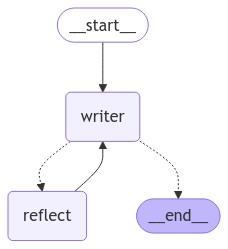

In [13]:
# 可视化图
from IPython.display import Image, display

try:
    display(
        Image(
            graph.get_graph(xray=True).draw_mermaid_png()
        )
    )
except Exception as e:
    print(f"Error generating graph: {e}")

In [14]:
from IPython.display import Markdown, display

# 定义装饰器，记录函数调用次数
def track_steps(func):
    step_counter = {'count': 0}  # 用于记录调用次数
    
    def wrapper(event, *args, **kwargs):
        # 增加调用次数
        step_counter['count'] += 1
        # 在函数调用之前打印 step
        display(Markdown(f"## Round {step_counter['count']}"))
        # 调用原始函数
        return func(event, *args, **kwargs)
    
    return wrapper

# 使用装饰器装饰 pretty_print_event_markdown 函数
@track_steps
def pretty_print_event_markdown(event):
    # 如果是生成写作部分
    if 'writer' in event:
        generate_md = "#### 写作生成:\n"
        for message in event['writer']['messages']:
            generate_md += f"- {message.content}\n"
        display(Markdown(generate_md))
    
    # 如果是反思评论部分
    if 'reflect' in event:
        reflect_md = "#### 评论反思:\n"
        for message in event['reflect']['messages']:
            reflect_md += f"- {message.content}\n"
        display(Markdown(reflect_md))

In [15]:
inputs = {
    "messages": [
        HumanMessage(content="中年老爷们最可悲的事情，是做了很多事情，最终只是感动了自己")
    ],
}

config = {"configurable": {"thread_id": "1"}}

async for event in graph.astream(inputs, config):
    pretty_print_event_markdown(event)


## Round 1

#### 写作生成:
- 标题：中年老爷们的心酸：拼搏半生，感动的只是自己

正文：

步入中年，许多老爷们心中都有一份无言的沉重。是的，他们走过了青春的热血，踏过了事业的高峰，也经历了人生的低谷。可是，当他们在某个深夜独自回想时，或许会发现，一个最可悲的现实是：拼搏了半生，最终感动的只是自己。

### 1. 家庭的责任，心酸的付出

中年老爷们大多肩负着家庭的重担。他们起早贪黑，奔波在职场与家庭之间，为了家人的幸福，他们愿意付出一切。然而，家庭成员可能并不总能理解他们的付出。孩子们在成长的过程中，看到的可能只是父亲的严厉和不在身边的遗憾；妻子也可能因为长期的分居两地或是生活琐事的积压，感到不满和焦虑。于是，这些默默的付出，最终被忽视，成了无人感知的心酸。

### 2. 事业的追求，孤独的坚持

在职场上，中年老爷们面临着巨大的压力。他们需要不断学习，适应快速变化的环境，才能保住自己的职位。然而，职场的竞争无情且残酷，许多人费尽心力，仍旧难以突破瓶颈。即便他们取得了些许成就，或许也只是在孤独中品味着那份短暂的喜悦，因为身边的人不一定能真正体会到他们的艰辛和努力。

### 3. 友情的变迁，寂寞的心境

年少时的友谊，总是那样纯粹和炙热。可随着时间的流逝，曾经的好友们也各自有了家庭和事业，聚少离多成了常态。中年老爷们在某个下班后的夜晚，或许会突然想起那些一起喝酒、谈天说地的日子，但再拨通电话时，却发现对方也忙于自己的生活，难以再续当年的情谊。这份友情的变迁，让他们感到无比的寂寞。

### 4. 自我价值的迷失，无奈的感动

在这条拼搏的道路上，中年老爷们常常会反思自己的价值。从前的梦想和激情，逐渐被现实的压力所取代。他们或许会在某个瞬间，被自己曾经的努力和坚持所感动，但这种感动却显得那样自我和孤独。他们渴望得到认可和理解，但这份感动往往无人分享，无人共鸣。

### 结语

中年老爷们的心酸，或许就是在于他们默默地付出和坚持，最终感动的只是自己。然而，这份感动，也是一种无言的力量。它支撑着他们继续前行，面对生活的种种挑战。我们应当更多地关注和理解这些中年老爷们，给予他们更多的支持和关爱，因为他们的拼搏和付出，值得被看见和珍惜。


## Round 2

#### 评论反思:
- ### 优化建议：

1. **标题优化**：
   - 目前的标题略显平淡，建议增加一些情感和吸引力。例如：
      - “中年老爷们的心酸：拼搏半生，谁懂我的孤独？”
      - “拼搏半生，中年男人的无奈与孤独”

2. **开头部分**：
   - 开头需要更引人入胜，可以通过提问或引用名人名言来抓住读者的注意力。例如：
      - 引用：“生活就像一场马拉松，跑得快的人未必赢，真正的赢家是那些坚持到终点的人。”——某位哲人
      - 提问：“你是否也曾在深夜里，独自思索：拼搏半生，究竟为了什么？”

3. **具体段落优化**：

   **家庭的责任，心酸的付出**
   - 目前的描述有些泛泛而谈，可以更具体一些。例如：
      - “清晨六点，他在家人尚未醒来时出门，深夜十一点归家时，孩子已经入睡。这样的日子一天天重复，他不辞辛劳，只为家人能过上更好的生活。然而，孩子们却只记得他不在身边的遗憾，妻子也在日复一日的等待中感到失落。”

   **事业的追求，孤独的坚持**
   - 强调更加个人化的经历和具体例子。例如：
      - “在公司，他是那个总能第一个到岗、最后一个离开的员工。每一个项目的成功背后，都是无数个加班的夜晚。但当他终于站上领奖台时，却发现没有一个人真正了解他的辛苦。”

   **友情的变迁，寂寞的心境**
   - 加入具体的情景描写，增加情感共鸣。例如：
      - “某个下班后的夜晚，他独自在酒吧里喝着啤酒，想着曾经和好友们在一起的欢乐时光。拨通电话，对方却忙于应对孩子的哭闹和家庭琐事，无法再续当年的情谊。”

   **自我价值的迷失，无奈的感动**
   - 增强情感张力，描述更细腻。例如：
      - “他曾经怀揣梦想，想要改变世界。然而，现实的重压让他逐渐迷失了方向。某个夜晚，他翻看着旧照片，眼角不禁湿润，感动于自己曾经的坚持，但这份感动却无人分享。”

4. **结尾部分**：
   - 结尾可以更加感人和有力量，呼吁大家关注这些中年老爷们。例如：
      - “中年老爷们的心酸，或许无人能懂，但他们的每一份付出都值得被尊重。让我们多一些理解和关爱，给这些默默拼搏的英雄们送去一份温暖，因为他们的努力，值得被看见。”

5. **整体语气和用词**：
   - 语气可以适当柔和一些，用词更加具体细腻，避免过于笼统。例如：
      - “他们在家庭与事业之间艰难平衡，每一个选择都充满了心酸与无奈。”
      - “每一次的努力，或许都只能换来自己的一声叹息，但他们依然不放弃，因为他们知道，生活需要继续。”

通过以上优化，文章将更符合今日头条读者的阅读习惯，激发情感共鸣，提升阅读量。


## Round 3

#### 写作生成:
- ### 标题：拼搏半生，中年男人的无奈与孤独：谁懂我的心酸？

### 开头部分：

“生活就像一场马拉松，跑得快的人未必赢，真正的赢家是那些坚持到终点的人。”——某位哲人

你是否也曾在深夜里，独自思索：拼搏半生，究竟为了什么？对于许多中年老爷们来说，这个问题无时无刻不在心中回荡。他们走过了青春的热血，踏过了事业的高峰，也经历了人生的低谷。可当他们在某个寂静的夜晚回顾这一切时，或许会发现，一个最可悲的现实是：拼搏了半生，最终感动的只是自己。

### 家庭的责任，心酸的付出

清晨六点，他在家人尚未醒来时出门，深夜十一点归家时，孩子已经入睡。这样的日子一天天重复，他不辞辛劳，只为家人能过上更好的生活。为了孩子能上更好的学校，为了妻子能过上更舒适的生活，他愿意牺牲自己的一切。然而，孩子们却只记得他不在身边的遗憾，妻子也在日复一日的等待中感到失落。于是，这些默默的付出，最终被忽视，成了无人感知的心酸。

### 事业的追求，孤独的坚持

在公司，他是那个总能第一个到岗、最后一个离开的员工。每一个项目的成功背后，都是无数个加班的夜晚。为了一个合同，他可以连续几天不眠不休；为了一个项目，他可以放弃所有的休息时间。但当他终于站上领奖台时，却发现没有一个人真正了解他的辛苦。即便他们取得了些许成就，或许也只是在孤独中品味着那份短暂的喜悦，这份孤独，无人能懂。

### 友情的变迁，寂寞的心境

某个下班后的夜晚，他独自在酒吧里喝着啤酒，想着曾经和好友们在一起的欢乐时光。年少时的友谊，总是那样纯粹和炙热，可随着时间的流逝，曾经的好友们也各自有了家庭和事业，聚少离多成了常态。拨通电话，对方却忙于应对孩子的哭闹和家庭琐事，无法再续当年的情谊。这份友情的变迁，让他感到无比的寂寞。

### 自我价值的迷失，无奈的感动

他曾经怀揣梦想，想要改变世界。然而，现实的重压让他逐渐迷失了方向。从前的梦想和激情，逐渐被现实的压力所取代。某个夜晚，他翻看着旧照片，眼角不禁湿润，感动于自己曾经的坚持，但这份感动却无人分享，无人共鸣。他渴望得到认可和理解，但这份感动往往是那么自我和孤独。

### 结尾部分：

中年老爷们的心酸，或许无人能懂，但他们的每一份付出都值得被尊重。他们在家庭与事业之间艰难平衡，每一个选择都充满了心酸与无奈。让我们多一些理解和关爱，给这些默默拼搏的英雄们送去一份温暖，因为他们的努力，值得被看见。每一次的努力，或许都只能换来自己的一声叹息，但他们依然不放弃，因为他们知道，生活需要继续。让我们一起，为这些默默无闻的拼搏者，送上最真挚的敬意。


## Round 4

#### 评论反思:
- ### 进一步优化建议：

1. **标题优化**：
   - 现有标题已较为吸引人，但可以略微调整以增加情感冲击力，例如：
     - “拼搏半生，中年男人的无奈与孤独：谁懂我的心酸与坚守？”

2. **开头部分**：
   - 引用名言和提问的方式很好，进一步优化情感表达：
     - “‘生活就像一场马拉松，跑得快的人未必赢，真正的赢家是那些坚持到终点的人。’——某位哲人
     - 你是否也曾在深夜里，独自思索：拼搏半生，究竟为了什么？对于许多中年老爷们来说，这个问题无时无刻不在心中回荡。他们走过了青春的热血，踏过了事业的高峰，也经历了人生的低谷。可当他们在某个寂静的夜晚回顾这一切时，或许会发现，一个最可悲的现实是：拼搏了半生，最终感动的只是自己。”

3. **具体段落优化**：

   **家庭的责任，心酸的付出**
   - 细节描写增强情感共鸣：
     - “每天早晨六点，他在家人尚未醒来时悄然出门，夜晚十一点归家时，孩子早已进入梦乡。这样的日子反复上演，他不辞辛劳，只为家人能过上更好的生活。他为孩子上更好的学校，为妻子过上舒适的生活，甘愿牺牲自己的一切。然而，孩子们记住的只是他不在身边的遗憾，妻子也在日复一日的等待中感到失落。于是，这些默默的付出，终被忽视，化作无人感知的心酸。”

   **事业的追求，孤独的坚持**
   - 描写更具体，增强情感：
     - “在公司，他总是第一个到岗、最后一个离开的员工。每一个项目的成功背后，都是无数个加班的夜晚。为了一个合同，他可以连续几天不眠不休；为了一个项目，他放弃所有的休息时间。当他终于站上领奖台时，却发现没有一个人真正了解他的辛苦。即便取得了成就，也只是孤独中品味着那份短暂的喜悦，这份孤独，无人能懂。”

   **友情的变迁，寂寞的心境**
   - 情景描写增强代入感：
     - “某个下班后的夜晚，他独自在酒吧里喝着啤酒，回忆着和好友们一起的欢乐时光。年少时的友谊，总是那样纯粹和炙热。可随着时间流逝，曾经的好友们各自有了家庭和事业，聚少离多成了常态。拨通电话，对方却忙于应对孩子的哭闹和家庭琐事，无法再续当年的情谊。这份友情的变迁，让他感到无比寂寞。”

   **自我价值的迷失，无奈的感动**
   - 进一步细腻描写，增强情感：
     - “他曾怀揣梦想，想要改变世界。然而，现实的重压逐渐让他迷失了方向。从前的梦想和激情被现实的压力所取代。某个夜晚，他翻看着旧照片，眼角湿润，感动于自己曾经的坚持，但这份感动却无人分享，无人共鸣。他渴望得到认可和理解，但这份感动往往是那么自我和孤独。”

4. **结尾部分**：
   - 结尾可以更有力量，呼吁大家关注中年老爷们：
     - “中年老爷们的心酸，或许无人能懂，但他们的每一份付出都值得被尊重。他们在家庭与事业之间艰难平衡，每一个选择都充满了心酸与无奈。让我们多一些理解和关爱，给这些默默拼搏的英雄们送去一份温暖，因为他们的努力，值得被看见。每一次的努力，或许都只能换来自己的一声叹息，但他们依然不放弃，因为他们知道，生活需要继续。让我们一起，为这些默默无闻的拼搏者，送上最真挚的敬意。”

通过这些优化，文章将更加具体生动，情感更加丰富，能够更好地激发读者共鸣，提升阅读量。


## Round 5

#### 写作生成:
- ### 标题：拼搏半生，中年男人的无奈与孤独：谁懂我的心酸与坚守？

### 开头部分：

“生活就像一场马拉松，跑得快的人未必赢，真正的赢家是那些坚持到终点的人。”——某位哲人

你是否也曾在深夜里，独自思索：拼搏半生，究竟为了什么？对于许多中年老爷们来说，这个问题无时无刻不在心中回荡。他们走过了青春的热血，踏过了事业的高峰，也经历了人生的低谷。可当他们在某个寂静的夜晚回顾这一切时，或许会发现，一个最可悲的现实是：拼搏了半生，最终感动的只是自己。

### 家庭的责任，心酸的付出

每天早晨六点，他在家人尚未醒来时悄然出门，夜晚十一点归家时，孩子早已进入梦乡。这样的日子反复上演，他不辞辛劳，只为家人能过上更好的生活。他为孩子上更好的学校，为妻子过上舒适的生活，甘愿牺牲自己的一切。然而，孩子们记住的只是他不在身边的遗憾，妻子也在日复一日的等待中感到失落。于是，这些默默的付出，终被忽视，化作无人感知的心酸。

### 事业的追求，孤独的坚持

在公司，他总是第一个到岗、最后一个离开的员工。每一个项目的成功背后，都是无数个加班的夜晚。为了一个合同，他可以连续几天不眠不休；为了一个项目，他放弃所有的休息时间。当他终于站上领奖台时，却发现没有一个人真正了解他的辛苦。即便取得了成就，也只是孤独中品味着那份短暂的喜悦，这份孤独，无人能懂。

### 友情的变迁，寂寞的心境

某个下班后的夜晚，他独自在酒吧里喝着啤酒，回忆着和好友们一起的欢乐时光。年少时的友谊，总是那样纯粹和炙热。可随着时间流逝，曾经的好友们各自有了家庭和事业，聚少离多成了常态。拨通电话，对方却忙于应对孩子的哭闹和家庭琐事，无法再续当年的情谊。这份友情的变迁，让他感到无比寂寞。

### 自我价值的迷失，无奈的感动

他曾怀揣梦想，想要改变世界。然而，现实的重压逐渐让他迷失了方向。从前的梦想和激情被现实的压力所取代。某个夜晚，他翻看着旧照片，眼角湿润，感动于自己曾经的坚持，但这份感动却无人分享，无人共鸣。他渴望得到认可和理解，但这份感动往往是那么自我和孤独。

### 结尾部分：

中年老爷们的心酸，或许无人能懂，但他们的每一份付出都值得被尊重。他们在家庭与事业之间艰难平衡，每一个选择都充满了心酸与无奈。让我们多一些理解和关爱，给这些默默拼搏的英雄们送去一份温暖，因为他们的努力，值得被看见。每一次的努力，或许都只能换来自己的一声叹息，但他们依然不放弃，因为他们知道，生活需要继续。让我们一起，为这些默默无闻的拼搏者，送上最真挚的敬意。


## Round 6

#### 评论反思:
- ### 标题：拼搏半生，中年男人的无奈与孤独：谁懂我的心酸与坚守？

### 开头部分：

“生活就像一场马拉松，跑得快的人未必赢，真正的赢家是那些坚持到终点的人。”——某位哲人

你是否也曾在深夜里，独自思索：拼搏半生，究竟为了什么？对于许多中年老爷们来说，这个问题无时无刻不在心中回荡。他们走过了青春的热血，踏过了事业的高峰，也经历了人生的低谷。可当他们在某个寂静的夜晚回顾这一切时，或许会发现，一个最可悲的现实是：拼搏了半生，最终感动的只是自己。

### 家庭的责任，心酸的付出

每天早晨六点，他在家人尚未醒来时悄然出门，夜晚十一点归家时，孩子早已进入梦乡。这样的日子反复上演，他不辞辛劳，只为家人能过上更好的生活。他为孩子上更好的学校，为妻子过上舒适的生活，甘愿牺牲自己的一切。然而，孩子们记住的只是他不在身边的遗憾，妻子也在日复一日的等待中感到失落。于是，这些默默的付出，终被忽视，化作无人感知的心酸。

### 事业的追求，孤独的坚持

在公司，他总是第一个到岗、最后一个离开的员工。每一个项目的成功背后，都是无数个加班的夜晚。为了一个合同，他可以连续几天不眠不休；为了一个项目，他放弃所有的休息时间。当他终于站上领奖台时，却发现没有一个人真正了解他的辛苦。即便取得了成就，也只是孤独中品味着那份短暂的喜悦，这份孤独，无人能懂。

### 友情的变迁，寂寞的心境

某个下班后的夜晚，他独自在酒吧里喝着啤酒，回忆着和好友们一起的欢乐时光。年少时的友谊，总是那样纯粹和炙热。可随着时间流逝，曾经的好友们各自有了家庭和事业，聚少离多成了常态。拨通电话，对方却忙于应对孩子的哭闹和家庭琐事，无法再续当年的情谊。这份友情的变迁，让他感到无比寂寞。

### 自我价值的迷失，无奈的感动

他曾怀揣梦想，想要改变世界。然而，现实的重压逐渐让他迷失了方向。从前的梦想和激情被现实的压力所取代。某个夜晚，他翻看着旧照片，眼角湿润，感动于自己曾经的坚持，但这份感动却无人分享，无人共鸣。他渴望得到认可和理解，但这份感动往往是那么自我和孤独。

### 结尾部分：

中年老爷们的心酸，或许无人能懂，但他们的每一份付出都值得被尊重。他们在家庭与事业之间艰难平衡，每一个选择都充满了心酸与无奈。让我们多一些理解和关爱，给这些默默拼搏的英雄们送去一份温暖，因为他们的努力，值得被看见。每一次的努力，或许都只能换来自己的一声叹息，但他们依然不放弃，因为他们知道，生活需要继续。让我们一起，为这些默默无闻的拼搏者，送上最真挚的敬意。

---

### 进一步优化建议：

1. **标题优化**：
   - 现有标题已经较为吸引人，但可以略微调整以增加情感冲击力，例如：
     - **“拼搏半生，中年男人的无奈与孤独：谁懂我的心酸与坚守？”**
     - **“中年拼搏：男人的无奈与孤独，谁懂我的心酸与坚守？”**

2. **开头部分**：
   - 引用名言和提问的方式很好，进一步优化情感表达：
     - “生活就像一场马拉松，跑得快的人未必赢，真正的赢家是那些坚持到终点的人。”——某位哲人
     - 你是否也曾在深夜里，独自思索：拼搏半生，究竟为了什么？对于许多中年老爷们来说，这个问题无时无刻不在心中回荡。他们走过了青春的热血，踏过了事业的高峰，也经历了人生的低谷。可当他们在某个寂静的夜晚回顾这一切时，或许会发现，一个最可悲的现实是：拼搏了半生，最终感动的只是自己。

3. **具体段落优化**：

   **家庭的责任，心酸的付出**
   - 细节描写增强情感共鸣：
     - “每天早晨六点，他在家人尚未醒来时悄然出门，夜晚十一点归家时，孩子早已进入梦乡。这样的日子反复上演，他不辞辛劳，只为家人能过上更好的生活。他为孩子上更好的学校，为妻子过上舒适的生活，甘愿牺牲自己的一切。然而，孩子们记住的只是他不在身边的遗憾，妻子也在日复一日的等待中感到失落。于是，这些默默的付出，终被忽视，化作无人感知的心酸。”

   **事业的追求，孤独的坚持**
   - 描写更加具体，增强情感：
     - “在公司，他总是第一个到岗、最后一个离开的员工。每一个项目的成功背后，都是无数个加班的夜晚。为了一个合同，他可以连续几天不眠不休；为了一个项目，他放弃所有的休息时间。当他终于站上领奖台时，却发现没有一个人真正了解他的辛苦。即便取得了成就，也只是孤独中品味着那份短暂的喜悦，这份孤独，无人能懂。”

   **友情的变迁，寂寞的心境**
   - 情景描写增强代入感：
     - “某个下班后的夜晚，他独自在酒吧里喝着啤酒，回忆着和好友们一起的欢乐时光。年少时的友谊，总是那样纯粹和炙热。可随着时间流逝，曾经的好友们各自有了家庭和事业，聚少离多成了常态。拨通电话，对方却忙于应对孩子的哭闹和家庭琐事，无法再续当年的情谊。这份友情的变迁，让他感到无比寂寞。”

   **自我价值的迷失，无奈的感动**
   - 进一步细腻描写，增强情感：
     - “他曾怀揣梦想，想要改变世界。然而，现实的重压逐渐让他迷失了方向。从前的梦想和激情被现实的压力所取代。某个夜晚，他翻看着旧照片，眼角湿润，感动于自己曾经的坚持，但这份感动却无人分享，无人共鸣。他渴望得到认可和理解，但这份感动往往是那么自我和孤独。”

4. **结尾部分**：
   - 结尾更有力量，呼吁大家关注中年老爷们：
     - “中年老爷们的心酸，或许无人能懂，但他们的每一份付出都值得被尊重。他们在家庭与事业之间艰难平衡，每一个选择都充满了心酸与无奈。让我们多一些理解和关爱，给这些默默拼搏的英雄们送去一份温暖，因为他们的努力，值得被看见。每一次的努力，或许都只能换来自己的一声叹息，但他们依然不放弃，因为他们知道，生活需要继续。让我们一起，为这些默默无闻的拼搏者，送上最真挚的敬意。”

通过这些优化，文章将更加具体生动，情感更加丰富，能够更好地激发读者共鸣，提升阅读量。


## Round 7

#### 写作生成:
- ### 标题：中年拼搏：男人的无奈与孤独，谁懂我的心酸与坚守？

### 开头部分：

“生活就像一场马拉松，跑得快的人未必赢，真正的赢家是那些坚持到终点的人。”——某位哲人

你是否也曾在深夜里，独自思索：拼搏半生，究竟为了什么？对于许多中年老爷们来说，这个问题无时无刻不在心中回荡。他们走过了青春的热血，踏过了事业的高峰，也经历了人生的低谷。可当他们在某个寂静的夜晚回顾这一切时，或许会发现，一个最可悲的现实是：拼搏了半生，最终感动的只是自己。

### 家庭的责任，心酸的付出

每天早晨六点，他在家人尚未醒来时悄然出门，夜晚十一点归家时，孩子早已进入梦乡。这样的日子反复上演，他不辞辛劳，只为家人能过上更好的生活。他为孩子上更好的学校，为妻子过上舒适的生活，甘愿牺牲自己的一切。然而，孩子们记住的只是他不在身边的遗憾，妻子也在日复一日的等待中感到失落。于是，这些默默的付出，终被忽视，化作无人感知的心酸。

### 事业的追求，孤独的坚持

在公司，他总是第一个到岗、最后一个离开的员工。每一个项目的成功背后，都是无数个加班的夜晚。为了一个合同，他可以连续几天不眠不休；为了一个项目，他放弃所有的休息时间。当他终于站上领奖台时，却发现没有一个人真正了解他的辛苦。即便取得了成就，也只是孤独中品味着那份短暂的喜悦，这份孤独，无人能懂。

### 友情的变迁，寂寞的心境

某个下班后的夜晚，他独自在酒吧里喝着啤酒，回忆着和好友们一起的欢乐时光。年少时的友谊，总是那样纯粹和炙热。可随着时间流逝，曾经的好友们各自有了家庭和事业，聚少离多成了常态。拨通电话，对方却忙于应对孩子的哭闹和家庭琐事，无法再续当年的情谊。这份友情的变迁，让他感到无比寂寞。

### 自我价值的迷失，无奈的感动

他曾怀揣梦想，想要改变世界。然而，现实的重压逐渐让他迷失了方向。从前的梦想和激情被现实的压力所取代。某个夜晚，他翻看着旧照片，眼角湿润，感动于自己曾经的坚持，但这份感动却无人分享，无人共鸣。他渴望得到认可和理解，但这份感动往往是那么自我和孤独。

### 结尾部分：

中年老爷们的心酸，或许无人能懂，但他们的每一份付出都值得被尊重。他们在家庭与事业之间艰难平衡，每一个选择都充满了心酸与无奈。让我们多一些理解和关爱，给这些默默拼搏的英雄们送去一份温暖，因为他们的努力，值得被看见。每一次的努力，或许都只能换来自己的一声叹息，但他们依然不放弃，因为他们知道，生活需要继续。让我们一起，为这些默默无闻的拼搏者，送上最真挚的敬意。


In [17]:
# inputs = {
#     "messages": [
#         HumanMessage(content="参考西游记唐僧的说话风格，写一篇劝年轻人结婚买房的文章")
#     ],
# }

# config = {"configurable": {"thread_id": "1"}}

# async for event in graph.astream(inputs, config):
#     pretty_print_event_markdown(event)


In [36]:
inputs = {
    "messages": [
        HumanMessage(content="中年老爷们最可悲的事情，是做了很多事情，最终只是感动了自己，以此为主题写一篇激荡情绪的文章")
    ],
}

config = {"configurable": {"thread_id": "2"}}

async for event in graph.astream(inputs, config):
    pretty_print_event_markdown(event)


## Round 9

#### 写作生成:
- ### 中年老爷们的自我感动：一曲无奈与热血的悲歌

在风雨交加的中年岁月里，许多老爷们常常陷入一种矛盾的境地：他们满怀激情地为家庭、事业和梦想而奋斗，却在某个静谧的夜晚，蓦然发现自己所做的一切，似乎只是感动了自己。

#### 奋斗的初衷：为爱而战

年轻时的他们，眼中闪烁着梦想的光芒，心中燃烧着不灭的激情。他们相信，通过自己的努力，可以为家人创造一个美好的未来。他们不惜夜以继日地工作，咬牙坚持，默默承受着压力与孤独。每一滴汗水、每一个不眠之夜，都饱含着对家庭的深情厚谊。

#### 现实的残酷：梦想的碰撞

然而，现实往往比想象中更加残酷。尽管他们付出了无数的努力和心血，但结果却未必如人所愿。工作中的瓶颈、家庭琐事的纷扰，甚至是身体健康的逐渐衰退，都让他们感到力不从心。他们曾经以为，只要努力，就能换来幸福，然而，幸福却似乎离他们越来越远。

#### 自我感动：孤独的慰藉

在一次次的失败与挫折中，他们渐渐学会了自我安慰。他们会在深夜独自一人，回顾自己走过的路，感叹自己的不易。或许，他们会在一段煽情的音乐中泪流满面，亦或是在一部励志电影中找到共鸣。然而，这种感动，终究只是感动了自己。他们的努力和牺牲，并未得到应有的回报和理解。

#### 从感动到觉醒：寻找新的方向

然而，自我感动并非完全没有意义。它是一种情感的宣泄，也是一种内心的慰藉。更重要的是，它可以成为一种觉醒的力量。当他们意识到，生活不仅仅是为了感动自己，而是为了寻找真正的幸福和满足时，他们会重新审视自己的生活，寻找新的方向和目标。

或许，他们会选择放下那些沉重的负担，学会享受生活中的每一个小确幸。或许，他们会重新审视家庭关系，用心去感受亲情的温暖。或许，他们会找到一种新的生活方式，让自己在奋斗的同时，也能享受生活的美好。

#### 结语：无悔的岁月

中年老爷们的自我感动，是一曲无奈与热血的悲歌。然而，这首悲歌并非终点，而是他们人生中的一个转折点。当他们从自我感动中觉醒，重新找回生活的意义时，他们会发现，真正的幸福，原来一直在自己的心中。

在这条充满荆棘的道路上，他们无悔于自己的付出和努力。因为每一个感动的瞬间，都是他们生命中最真实的写照。无论前路如何，他们都会继续前行，带着那份深沉的爱与坚定的信念，走向更加美好的明天。


## Round 10

#### 评论反思:
- ### 文章评审和建议

#### 优点：
1. **情感真实**：文章情感充沛，能够引起读者的共鸣。特别是对中年男性在家庭和事业之间的挣扎描写得十分细腻。
2. **结构清晰**：文章结构分明，从奋斗的初衷到现实的残酷，再到自我感动和觉醒，层次分明，逻辑清晰。
3. **语言简洁**：语言简洁明了，没有过多的冗余，表达了深刻的内涵。

#### 改进建议：

1. **增加具体实例**：
   - 当前文章多为概括性描述，缺乏具体的实例。可以通过增加一些具体的事例或故事，来增强文章的真实性和说服力。例如，可以描述一个具体的中年男性在某个特定情境下的奋斗和感动过程，这会让读者更容易代入情境。

2. **深化主题**：
   - 文章可以进一步探讨“自我感动”的深层次原因和影响。比如，为什么中年男性容易陷入自我感动的情境？这种情感对他们的心理和生活有何具体影响？这些问题可以通过分析和讨论来深化主题。

3. **增加引导性的结论**：
   - 目前的结论部分较为宽泛。可以增加一些具体的建议或引导性的结论，帮助中年男性更好地面对自己的情感和生活。比如，可以提供一些实际的应对策略或心态调整的方法。

4. **提升文学性**：
   - 尽管语言简洁明了，但可以尝试加入一些文学修辞手法，如比喻、排比等，以增加文章的文学色彩和感染力。

5. **篇幅调整**：
   - 文章整体篇幅适中，但可以考虑在某些段落进行扩展，特别是在描写具体情景和感动瞬间时，以增加文章的可读性和深度。

#### 结语：
总体来说，文章能够较好地表达主题，情感真挚，结构清晰。但为了使文章更加生动、深入和有吸引力，建议增加具体实例和深入分析，并在结论部分提供一些实际建议。这些改进将有助于增强文章的说服力和影响力。


## Round 11

#### 写作生成:
- ### 中年老爷们的自我感动：一曲无奈与热血的悲歌

在风雨交加的中年岁月里，许多老爷们常常陷入一种矛盾的境地：他们满怀激情地为家庭、事业和梦想而奋斗，却在某个静谧的夜晚，蓦然发现自己所做的一切，似乎只是感动了自己。

#### 奋斗的初衷：为爱而战

年轻时的他们，眼中闪烁着梦想的光芒，心中燃烧着不灭的激情。他们相信，通过自己的努力，可以为家人创造一个美好的未来。他们不惜夜以继日地工作，咬牙坚持，默默承受着压力与孤独。每一滴汗水、每一个不眠之夜，都饱含着对家庭的深情厚谊。

例如，小李是一位普通的中年男人，他在一家工厂上班，每天早出晚归，为的是能够让妻子和孩子过上更好的生活。每次看到孩子们开心地玩耍，他都会觉得自己的辛苦是值得的。

#### 现实的残酷：梦想的碰撞

然而，现实往往比想象中更加残酷。尽管他们付出了无数的努力和心血，但结果却未必如人所愿。工作中的瓶颈、家庭琐事的纷扰，甚至是身体健康的逐渐衰退，都让他们感到力不从心。他们曾经以为，只要努力，就能换来幸福，然而，幸福却似乎离他们越来越远。

小李在一次工厂事故中受伤，虽然没有大碍，但却影响了他的工作效率。工厂对他的态度逐渐冷淡，甚至有了裁员的打算。家庭经济压力骤然增加，妻子也开始对他抱怨不断。这让小李陷入了深深的无力感和挫败感。

#### 自我感动：孤独的慰藉

在一次次的失败与挫折中，他们渐渐学会了自我安慰。他们会在深夜独自一人，回顾自己走过的路，感叹自己的不易。或许，他们会在一段煽情的音乐中泪流满面，亦或是在一部励志电影中找到共鸣。然而，这种感动，终究只是感动了自己。他们的努力和牺牲，并未得到应有的回报和理解。

小李常常在深夜里独自一人，听着《朋友》，回想着自己这些年的辛苦和付出，泪水不禁涌上眼眶。他觉得自己就像歌中的主人公，一直在努力，却没有人理解他的辛劳。

#### 从感动到觉醒：寻找新的方向

然而，自我感动并非完全没有意义。它是一种情感的宣泄，也是一种内心的慰藉。更重要的是，它可以成为一种觉醒的力量。当他们意识到，生活不仅仅是为了感动自己，而是为了寻找真正的幸福和满足时，他们会重新审视自己的生活，寻找新的方向和目标。

小李在一次偶然的机会中，参加了一个心理咨询讲座，讲师的一句话深深触动了他：“只有当你真正爱自己时，你才能更好地去爱别人。”他开始反思自己的生活，决定在继续努力工作的同时，也要学会放松和享受生活。

#### 提供实际建议：走出自我感动的困境

为了帮助那些陷入自我感动的中年老爷们更好地面对自己的情感和生活，可以考虑以下几种方法：
1. **寻求专业帮助**：心理咨询或参加相关的心理讲座，可以帮助他们更好地理解自己的情感，并找到应对的方法。
2. **培养兴趣爱好**：通过发展新的兴趣爱好，如运动、阅读或旅行，可以缓解压力，提升生活的质量。
3. **改善家庭关系**：与家人进行有效的沟通，表达自己的感受和需求，共同面对生活中的困难。
4. **健康管理**：关注自己的身体健康，定期体检，保持良好的生活习惯。

#### 结语：无悔的岁月

中年老爷们的自我感动，是一曲无奈与热血的悲歌。然而，这首悲歌并非终点，而是他们人生中的一个转折点。当他们从自我感动中觉醒，重新找回生活的意义时，他们会发现，真正的幸福，原来一直在自己的心中。

在这条充满荆棘的道路上，他们无悔于自己的付出和努力。因为每一个感动的瞬间，都是他们生命中最真实的写照。无论前路如何，他们都会继续前行，带着那份深沉的爱与坚定的信念，走向更加美好的明天。


## Round 12

#### 评论反思:
- ### 文章评审和建议

#### 优点：
1. **情感真实**：文章情感充沛，能够引起读者的共鸣。特别是通过具体的人物“小李”的故事，更加生动地展现了主题。
2. **结构清晰**：文章结构分明，从奋斗的初衷到现实的残酷，再到自我感动和觉醒，层次分明，逻辑清晰。
3. **实际建议**：增加的实际建议部分非常有帮助，为读者提供了具体的行动指南，增强了文章的实用性。

#### 改进建议：

1. **进一步丰富人物故事**：
   - 虽然“小李”的故事已经很好地增强了文章的真实性，但可以进一步细化和丰富。例如，可以描述更多小李在家庭中的具体互动，或者他在工厂中的具体工作细节，这样可以让读者更深入地了解他的处境和感受。

2. **加强情感描写和心理活动**：
   - 在描述小李的故事时，可以增加更多的情感描写和心理活动。例如，小李在工厂事故后的心理变化，他在面对妻子抱怨时的内心挣扎，这些可以通过更细腻的描写来增强情感的深度。

3. **提升文学表现力**：
   - 可以尝试加入一些文学修辞手法，如比喻、排比、对比等，以增加文章的文学色彩和感染力。例如，在描述小李的奋斗时，可以使用一些比喻来形容他的辛劳和孤独。

4. **扩展结语部分**：
   - 结语部分可以进一步扩展，强调觉醒后的积极变化和未来的希望。例如，可以描述小李在觉醒后的具体行动和生活变化，这样可以让文章结尾更有力，更具激励性。

#### 具体改进示例：

##### 奋斗的初衷：为爱而战
年轻时的他们，眼中闪烁着梦想的光芒，心中燃烧着不灭的激情。他们相信，通过自己的努力，可以为家人创造一个美好的未来。他们不惜夜以继日地工作，咬牙坚持，默默承受着压力与孤独。每一滴汗水、每一个不眠之夜，都饱含着对家庭的深情厚谊。

例如，小李是一位普通的中年男人，他在一家工厂上班，每天早出晚归，为的是能够让妻子和孩子过上更好的生活。每次看到孩子们开心地玩耍，他都会觉得自己的辛苦是值得的。他经常在凌晨四点起床，迎着晨曦出发，拖着疲惫的身躯回家时，夜幕早已降临。工厂的噪音和繁重的体力劳动，让他的双手布满老茧，但每当看到家人的笑脸，这些辛劳都变得值得。

##### 现实的残酷：梦想的碰撞
然而，现实往往比想象中更加残酷。尽管他们付出了无数的努力和心血，但结果却未必如人所愿。工作中的瓶颈、家庭琐事的纷扰，甚至是身体健康的逐渐衰退，都让他们感到力不从心。他们曾经以为，只要努力，就能换来幸福，然而，幸福却似乎离他们越来越远。

小李在一次工厂事故中受伤，虽然没有大碍，但却影响了他的工作效率。工厂对他的态度逐渐冷淡，甚至有了裁员的打算。家庭经济压力骤然增加，妻子也开始对他抱怨不断。这让小李陷入了深深的无力感和挫败感。他感到自己像是一块被时间磨损的石头，渐渐失去了光彩和价值。

##### 自我感动：孤独的慰藉
在一次次的失败与挫折中，他们渐渐学会了自我安慰。他们会在深夜独自一人，回顾自己走过的路，感叹自己的不易。或许，他们会在一段煽情的音乐中泪流满面，亦或是在一部励志电影中找到共鸣。然而，这种感动，终究只是感动了自己。他们的努力和牺牲，并未得到应有的回报和理解。

小李常常在深夜里独自一人，听着《朋友》，回想着自己这些年的辛苦和付出，泪水不禁涌上眼眶。他觉得自己就像歌中的主人公，一直在努力，却没有人理解他的辛劳。他会在深夜的阳台上，望着城市的灯火，心中充满了无尽的孤独和无奈。

##### 从感动到觉醒：寻找新的方向
然而，自我感动并非完全没有意义。它是一种情感的宣泄，也是一种内心的慰藉。更重要的是，它可以成为一种觉醒的力量。当他们意识到，生活不仅仅是为了感动自己，而是为了寻找真正的幸福和满足时，他们会重新审视自己的生活，寻找新的方向和目标。

小李在一次偶然的机会中，参加了一个心理咨询讲座，讲师的一句话深深触动了他：“只有当你真正爱自己时，你才能更好地去爱别人。”他开始反思自己的生活，决定在继续努力工作的同时，也要学会放松和享受生活。他开始每天抽出时间跑步，阅读自己喜欢的书籍，甚至学会了和孩子一起玩游戏。他发现，自己变得更加轻松和快乐，家庭关系也有所改善。

##### 结语：无悔的岁月
中年老爷们的自我感动，是一曲无奈与热血的悲歌。然而，这首悲歌并非终点，而是他们人生中的一个转折点。当他们从自我感动中觉醒，重新找回生活的意义时，他们会发现，真正的幸福，原来一直在自己的心中。

在这条充满荆棘的道路上，他们无悔于自己的付出和努力。因为每一个感动的瞬间，都是他们生命中最真实的写照。无论前路如何，他们都会继续前行，带着那份深沉的爱与坚定的信念，走向更加美好的明天。

总之，通过增加具体实例、加强情感描写、提升文学表现力和扩展结语部分，文章将更加生动、深入和吸引人。继续加油，相信你能写出更精彩的文章！


## Round 13

#### 写作生成:
- ### 中年老爷们的自我感动：一曲无奈与热血的悲歌

在风雨交加的中年岁月里，许多老爷们常常陷入一种矛盾的境地：他们满怀激情地为家庭、事业和梦想而奋斗，却在某个静谧的夜晚，蓦然发现自己所做的一切，似乎只是感动了自己。

#### 奋斗的初衷：为爱而战

年轻时的他们，眼中闪烁着梦想的光芒，心中燃烧着不灭的激情。他们相信，通过自己的努力，可以为家人创造一个美好的未来。他们不惜夜以继日地工作，咬牙坚持，默默承受着压力与孤独。每一滴汗水、每一个不眠之夜，都饱含着对家庭的深情厚谊。

例如，小李是一位普通的中年男人，他在一家工厂上班，每天早出晚归，为的是能够让妻子和孩子过上更好的生活。每次看到孩子们开心地玩耍，他都会觉得自己的辛苦是值得的。他经常在凌晨四点起床，迎着晨曦出发，拖着疲惫的身躯回家时，夜幕早已降临。工厂的噪音和繁重的体力劳动，让他的双手布满老茧，但每当看到家人的笑脸，这些辛劳都变得值得。

#### 现实的残酷：梦想的碰撞

然而，现实往往比想象中更加残酷。尽管他们付出了无数的努力和心血，但结果却未必如人所愿。工作中的瓶颈、家庭琐事的纷扰，甚至是身体健康的逐渐衰退，都让他们感到力不从心。他们曾经以为，只要努力，就能换来幸福，然而，幸福却似乎离他们越来越远。

小李在一次工厂事故中受伤，虽然没有大碍，但却影响了他的工作效率。工厂对他的态度逐渐冷淡，甚至有了裁员的打算。家庭经济压力骤然增加，妻子也开始对他抱怨不断。这让小李陷入了深深的无力感和挫败感。他感到自己像是一块被时间磨损的石头，渐渐失去了光彩和价值。

#### 自我感动：孤独的慰藉

在一次次的失败与挫折中，他们渐渐学会了自我安慰。他们会在深夜独自一人，回顾自己走过的路，感叹自己的不易。或许，他们会在一段煽情的音乐中泪流满面，亦或是在一部励志电影中找到共鸣。然而，这种感动，终究只是感动了自己。他们的努力和牺牲，并未得到应有的回报和理解。

小李常常在深夜里独自一人，听着《朋友》，回想着自己这些年的辛苦和付出，泪水不禁涌上眼眶。他觉得自己就像歌中的主人公，一直在努力，却没有人理解他的辛劳。他会在深夜的阳台上，望着城市的灯火，心中充满了无尽的孤独和无奈。

#### 从感动到觉醒：寻找新的方向

然而，自我感动并非完全没有意义。它是一种情感的宣泄，也是一种内心的慰藉。更重要的是，它可以成为一种觉醒的力量。当他们意识到，生活不仅仅是为了感动自己，而是为了寻找真正的幸福和满足时，他们会重新审视自己的生活，寻找新的方向和目标。

小李在一次偶然的机会中，参加了一个心理咨询讲座，讲师的一句话深深触动了他：“只有当你真正爱自己时，你才能更好地去爱别人。”他开始反思自己的生活，决定在继续努力工作的同时，也要学会放松和享受生活。他开始每天抽出时间跑步，阅读自己喜欢的书籍，甚至学会了和孩子一起玩游戏。他发现，自己变得更加轻松和快乐，家庭关系也有所改善。

#### 提供实际建议：走出自我感动的困境

为了帮助那些陷入自我感动的中年老爷们更好地面对自己的情感和生活，可以考虑以下几种方法：
1. **寻求专业帮助**：心理咨询或参加相关的心理讲座，可以帮助他们更好地理解自己的情感，并找到应对的方法。
2. **培养兴趣爱好**：通过发展新的兴趣爱好，如运动、阅读或旅行，可以缓解压力，提升生活的质量。
3. **改善家庭关系**：与家人进行有效的沟通，表达自己的感受和需求，共同面对生活中的困难。
4. **健康管理**：关注自己的身体健康，定期体检，保持良好的生活习惯。

#### 结语：无悔的岁月

中年老爷们的自我感动，是一曲无奈与热血的悲歌。然而，这首悲歌并非终点，而是他们人生中的一个转折点。当他们从自我感动中觉醒，重新找回生活的意义时，他们会发现，真正的幸福，原来一直在自己的心中。

在这条充满荆棘的道路上，他们无悔于自己的付出和努力。因为每一个感动的瞬间，都是他们生命中最真实的写照。无论前路如何，他们都会继续前行，带着那份深沉的爱与坚定的信念，走向更加美好的明天。

总之，通过增加具体实例、加强情感描写、提升文学表现力和扩展结语部分，文章将更加生动、深入和吸引人。继续加油，相信你能写出更精彩的文章！


## Round 14

#### 评论反思:
- ### 文章评审和建议

#### 优点：
1. **情感真实**：文章情感充沛，通过具体人物“小李”的故事，生动展现了主题，能够引起读者的共鸣。
2. **结构清晰**：文章结构较为分明，从奋斗的初衷到现实的残酷，再到自我感动和觉醒，层次清晰，逻辑顺畅。
3. **实际建议**：提供了具体的行动指南，具有实用性，增强了文章的指导意义。

#### 改进建议：

1. **进一步丰富人物故事**：
   - 虽然“小李”的故事已经很好地增强了文章的真实性，但可以进一步细化和丰富。例如，可以增加更多小李在家庭中的具体互动，或者他在工厂中的具体工作细节，这样可以让读者更深入地了解他的处境和感受。

2. **加强情感描写和心理活动**：
   - 在描述小李的故事时，可以增加更多的情感描写和心理活动。例如，小李在工厂事故后的心理变化，他在面对妻子抱怨时的内心挣扎，这些可以通过更细腻的描写来增强情感的深度。

3. **提升文学表现力**：
   - 可以尝试加入一些文学修辞手法，如比喻、排比、对比等，以增加文章的文学色彩和感染力。例如，在描述小李的奋斗时，可以使用一些比喻来形容他的辛劳和孤独。

4. **扩展结语部分**：
   - 结语部分可以进一步扩展，强调觉醒后的积极变化和未来的希望。例如，可以描述小李在觉醒后的具体行动和生活变化，这样可以让文章结尾更有力，更具激励性。

#### 具体改进示例：

##### 奋斗的初衷：为爱而战
年轻时的他们，眼中闪烁着梦想的光芒，心中燃烧着不灭的激情。他们相信，通过自己的努力，可以为家人创造一个美好的未来。他们不惜夜以继日地工作，咬牙坚持，默默承受着压力与孤独。每一滴汗水、每一个不眠之夜，都饱含着对家庭的深情厚谊。

例如，小李是一位普通的中年男人，他在一家工厂上班，每天早出晚归，为的是能够让妻子和孩子过上更好的生活。每次看到孩子们开心地玩耍，他都会觉得自己的辛苦是值得的。他经常在凌晨四点起床，迎着晨曦出发，拖着疲惫的身躯回家时，夜幕早已降临。工厂的噪音和繁重的体力劳动，让他的双手布满老茧，但每当看到家人的笑脸，这些辛劳都变得值得。

##### 现实的残酷：梦想的碰撞
然而，现实往往比想象中更加残酷。尽管他们付出了无数的努力和心血，但结果却未必如人所愿。工作中的瓶颈、家庭琐事的纷扰，甚至是身体健康的逐渐衰退，都让他们感到力不从心。他们曾经以为，只要努力，就能换来幸福，然而，幸福却似乎离他们越来越远。

小李在一次工厂事故中受伤，虽然没有大碍，但却影响了他的工作效率。工厂对他的态度逐渐冷淡，甚至有了裁员的打算。家庭经济压力骤然增加，妻子也开始对他抱怨不断。这让小李陷入了深深的无力感和挫败感。他感到自己像是一块被时间磨损的石头，渐渐失去了光彩和价值。

##### 自我感动：孤独的慰藉
在一次次的失败与挫折中，他们渐渐学会了自我安慰。他们会在深夜独自一人，回顾自己走过的路，感叹自己的不易。或许，他们会在一段煽情的音乐中泪流满面，亦或是在一部励志电影中找到共鸣。然而，这种感动，终究只是感动了自己。他们的努力和牺牲，并未得到应有的回报和理解。

小李常常在深夜里独自一人，听着《朋友》，回想着自己这些年的辛苦和付出，泪水不禁涌上眼眶。他觉得自己就像歌中的主人公，一直在努力，却没有人理解他的辛劳。他会在深夜的阳台上，望着城市的灯火，心中充满了无尽的孤独和无奈。

##### 从感动到觉醒：寻找新的方向
然而，自我感动并非完全没有意义。它是一种情感的宣泄，也是一种内心的慰藉。更重要的是，它可以成为一种觉醒的力量。当他们意识到，生活不仅仅是为了感动自己，而是为了寻找真正的幸福和满足时，他们会重新审视自己的生活，寻找新的方向和目标。

小李在一次偶然的机会中，参加了一个心理咨询讲座，讲师的一句话深深触动了他：“只有当你真正爱自己时，你才能更好地去爱别人。”他开始反思自己的生活，决定在继续努力工作的同时，也要学会放松和享受生活。他开始每天抽出时间跑步，阅读自己喜欢的书籍，甚至学会了和孩子一起玩游戏。他发现，自己变得更加轻松和快乐，家庭关系也有所改善。

##### 提供实际建议：走出自我感动的困境
为了帮助那些陷入自我感动的中年老爷们更好地面对自己的情感和生活，可以考虑以下几种方法：
1. **寻求专业帮助**：心理咨询或参加相关的心理讲座，可以帮助他们更好地理解自己的情感，并找到应对的方法。
2. **培养兴趣爱好**：通过发展新的兴趣爱好，如运动、阅读或旅行，可以缓解压力，提升生活的质量。
3. **改善家庭关系**：与家人进行有效的沟通，表达自己的感受和需求，共同面对生活中的困难。
4. **健康管理**：关注自己的身体健康，定期体检，保持良好的生活习惯。

##### 结语：无悔的岁月
中年老爷们的自我感动，是一曲无奈与热血的悲歌。然而，这首悲歌并非终点，而是他们人生中的一个转折点。当他们从自我感动中觉醒，重新找回生活的意义时，他们会发现，真正的幸福，原来一直在自己的心中。

在这条充满荆棘的道路上，他们无悔于自己的付出和努力。因为每一个感动的瞬间，都是他们生命中最真实的写照。无论前路如何，他们都会继续前行，带着那份深沉的爱与坚定的信念，走向更加美好的明天。

总之，通过增加具体实例、加强情感描写、提升文学表现力和扩展结语部分，文章将更加生动、深入和吸引人。继续加油，相信你能写出更精彩的文章！


## Round 15

#### 写作生成:
- ### 中年老爷们的自我感动：一曲无奈与热血的悲歌

在风雨交加的中年岁月里，许多老爷们常常陷入一种矛盾的境地：他们满怀激情地为家庭、事业和梦想而奋斗，却在某个静谧的夜晚，蓦然发现自己所做的一切，似乎只是感动了自己。

#### 奋斗的初衷：为爱而战

年轻时的他们，眼中闪烁着梦想的光芒，心中燃烧着不灭的激情。他们相信，通过自己的努力，可以为家人创造一个美好的未来。他们不惜夜以继日地工作，咬牙坚持，默默承受着压力与孤独。每一滴汗水、每一个不眠之夜，都饱含着对家庭的深情厚谊。

例如，小李是一位普通的中年男人，他在一家工厂上班，每天早出晚归，为的是能够让妻子和孩子过上更好的生活。每次看到孩子们开心地玩耍，他都会觉得自己的辛苦是值得的。他经常在凌晨四点起床，迎着晨曦出发，拖着疲惫的身躯回家时，夜幕早已降临。工厂的噪音和繁重的体力劳动，让他的双手布满老茧，但每当看到家人的笑脸，这些辛劳都变得值得。

#### 现实的残酷：梦想的碰撞

然而，现实往往比想象中更加残酷。尽管他们付出了无数的努力和心血，但结果却未必如人所愿。工作中的瓶颈、家庭琐事的纷扰，甚至是身体健康的逐渐衰退，都让他们感到力不从心。他们曾经以为，只要努力，就能换来幸福，然而，幸福却似乎离他们越来越远。

小李在一次工厂事故中受伤，虽然没有大碍，但却影响了他的工作效率。工厂对他的态度逐渐冷淡，甚至有了裁员的打算。家庭经济压力骤然增加，妻子也开始对他抱怨不断。这让小李陷入了深深的无力感和挫败感。他感到自己像是一块被时间磨损的石头，渐渐失去了光彩和价值。

#### 自我感动：孤独的慰藉

在一次次的失败与挫折中，他们渐渐学会了自我安慰。他们会在深夜独自一人，回顾自己走过的路，感叹自己的不易。或许，他们会在一段煽情的音乐中泪流满面，亦或是在一部励志电影中找到共鸣。然而，这种感动，终究只是感动了自己。他们的努力和牺牲，并未得到应有的回报和理解。

小李常常在深夜里独自一人，听着《朋友》，回想着自己这些年的辛苦和付出，泪水不禁涌上眼眶。他觉得自己就像歌中的主人公，一直在努力，却没有人理解他的辛劳。他会在深夜的阳台上，望着城市的灯火，心中充满了无尽的孤独和无奈。

#### 从感动到觉醒：寻找新的方向

然而，自我感动并非完全没有意义。它是一种情感的宣泄，也是一种内心的慰藉。更重要的是，它可以成为一种觉醒的力量。当他们意识到，生活不仅仅是为了感动自己，而是为了寻找真正的幸福和满足时，他们会重新审视自己的生活，寻找新的方向和目标。

小李在一次偶然的机会中，参加了一个心理咨询讲座，讲师的一句话深深触动了他：“只有当你真正爱自己时，你才能更好地去爱别人。”他开始反思自己的生活，决定在继续努力工作的同时，也要学会放松和享受生活。他开始每天抽出时间跑步，阅读自己喜欢的书籍，甚至学会了和孩子一起玩游戏。他发现，自己变得更加轻松和快乐，家庭关系也有所改善。

#### 提供实际建议：走出自我感动的困境

为了帮助那些陷入自我感动的中年老爷们更好地面对自己的情感和生活，可以考虑以下几种方法：
1. **寻求专业帮助**：心理咨询或参加相关的心理讲座，可以帮助他们更好地理解自己的情感，并找到应对的方法。
2. **培养兴趣爱好**：通过发展新的兴趣爱好，如运动、阅读或旅行，可以缓解压力，提升生活的质量。
3. **改善家庭关系**：与家人进行有效的沟通，表达自己的感受和需求，共同面对生活中的困难。
4. **健康管理**：关注自己的身体健康，定期体检，保持良好的生活习惯。

#### 结语：无悔的岁月

中年老爷们的自我感动，是一曲无奈与热血的悲歌。然而，这首悲歌并非终点，而是他们人生中的一个转折点。当他们从自我感动中觉醒，重新找回生活的意义时，他们会发现，真正的幸福，原来一直在自己的心中。

小李开始每天抽出时间跑步，阅读自己喜欢的书籍，甚至学会了和孩子一起玩游戏。他发现，自己变得更加轻松和快乐，家庭关系也有所改善。在这条充满荆棘的道路上，他们无悔于自己的付出和努力。因为每一个感动的瞬间，都是他们生命中最真实的写照。无论前路如何，他们都会继续前行，带着那份深沉的爱与坚定的信念，走向更加美好的明天。

总之，通过增加具体实例、加强情感描写、提升文学表现力和扩展结语部分，文章将更加生动、深入和吸引人。继续加油，相信你能写出更精彩的文章！


## Homework: 

1. 扩展本指南的 Reflection Agent，使其能够完成更通用的生成任务，包括但不限于代码、报告等；
2. 使用扩展后的 Reflection Agent 生成代码，实现在 GitHubSentinel 上新增一个信息渠道。

### 如何让 Reflection `System Prompt` 更加通用：

如果你想让这个 `System Prompt` 适用于更广泛的内容评估场景，不局限于作文，你可以做一些轻微的调整。例如：

```python
reflection_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a reviewer tasked with providing constructive critique and improvement suggestions for the user's submission."
            " Offer detailed feedback, including recommendations on clarity, structure, content depth, and style, as well as areas for improvement.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)
```

### 修改后的变化：
1. **角色定位更广泛**：从“老师”改为“审阅者”，这样不局限于评估作文，适用于各种类型的内容，包括文章、报告、甚至代码审查。
  
2. **批评与改进建议的灵活性**：从作文的“长度、深度、风格”拓展为“清晰度、结构、内容深度、风格”，这使得反馈更加多样化，适用于不同的内容类型。

通过这种方式，可以让模型在更多场景下提供高质量的评估和反馈。